RNN_LSTM


--- Training SimpleRNN Model ---
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.1981
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7218e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8480e-04
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.4372e-04
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 16/50
32/32

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

--- Model Evaluation ---
SimpleRNN Model MSE (on original data): 437489.9531
LSTM Model MSE (on original data):      2446554.8066


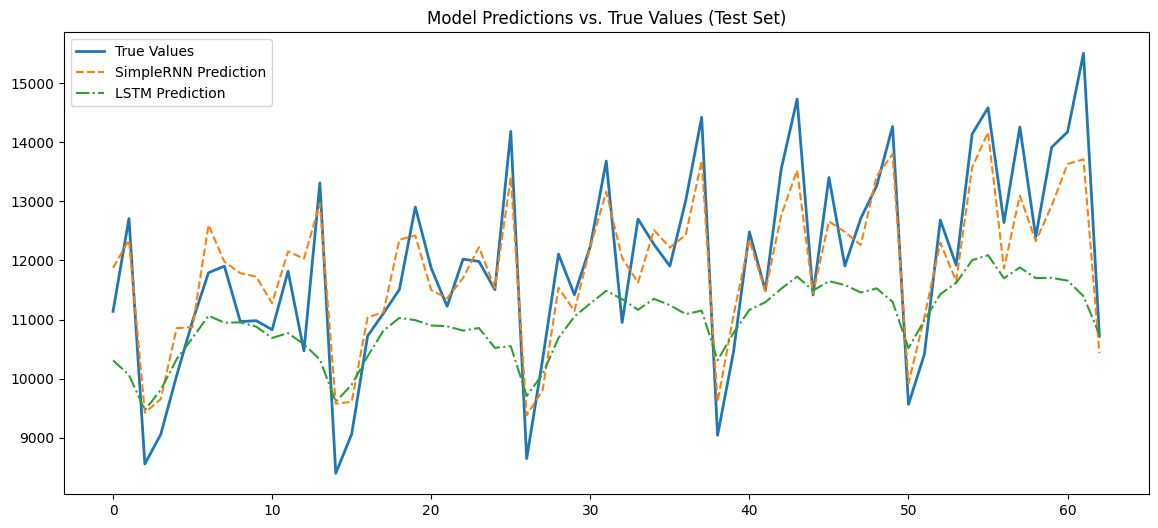

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # Import MSE

# --- 1. Load and Preprocess Data ---
df = pd.read_csv('/content/drive/MyDrive/College/3-2/04. 기계학습프로그래밍/CODE/8/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# --- 2. Create Time Series Windows ---
window = 12  # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data) - window):
    X.append(data[i:i + window])
    y.append(data[i + window])
X, y = np.array(X), np.array(y)

# --- 3. Split into Train and Test Sets ---
# We MUST NOT shuffle time series data, so shuffle=False
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# --- 4. Define and Train SimpleRNN Model ---
print("\n--- Training SimpleRNN Model ---")
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window, 1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# --- 5. Define and Train LSTM Model ---
print("\n--- Training LSTM Model ---")
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# --- 6. Make Predictions on Test Data ---
pred_rnn = model_rnn.predict(X_test)
pred_lstm = model_lstm.predict(X_test)

# --- 7. Inverse Transform Data (Back to Original Sales Numbers) ---
# This is crucial for interpreting the results and MSE
y_test_orig = scaler.inverse_transform(y_test)
pred_rnn_orig = scaler.inverse_transform(pred_rnn)
pred_lstm_orig = scaler.inverse_transform(pred_lstm)

# --- 8. Calculate and Print MSE ---
mse_rnn = mean_squared_error(y_test_orig, pred_rnn_orig)
mse_lstm = mean_squared_error(y_test_orig, pred_lstm_orig)

print("\n--- Model Evaluation ---")
print(f"SimpleRNN Model MSE (on original data): {mse_rnn:.4f}")
print(f"LSTM Model MSE (on original data):      {mse_lstm:.4f}")

# --- 9. Visualize Results ---
plt.figure(figsize=(14, 6))
plt.title("Model Predictions vs. True Values (Test Set)")
plt.plot(y_test_orig, label='True Values', linewidth=2)
plt.plot(pred_rnn_orig, label='SimpleRNN Prediction', linestyle='--')
plt.plot(pred_lstm_orig, label='LSTM Prediction', linestyle='-.')
plt.legend()
plt.show()